## Daegu Apartment

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

# 1. Business Problem Understanding

### 1.1 Context

Daegu adalah kota terbesar peringkat 3 di Korea Selatan setelah Seoul dan Busan dan kota di Korea Selatan dengan jumlah penduduk terbanyak peringkat 4 dengan lebih dari 2.5 juta penduduk. Korea Selatan sering dijuluki sebagai "The Republic of Apartments" karena berdasarkan penelitian pada tahun 2019 bahwa Korea Selatan memiliki sekitar 11.3 juta apartemen yaitu 62.3 % dari semua perumahan dan sekitar 6 dari 10 penduduk Korea Selatan tinggal di apartemen [1]. Karena penduduk Korea Selatan sangat bergantung kepada apartemen maka menetapkan harga yang sesuai itu sangat penting. Karena banyak pemilik apartemen memercayakan apartemen mereka kepada properti agent untuk transaksi, maka properti agent harus dapat menentukan harga apartemen yang sesuai berdasarkan fasilitas, lokasi, dan fitur-fitur lain.

### 1.2 Problem Statement 

**The Problem** : Karena demand untuk apartemen di Korea Selatan sangat tinggi, maka properti agent perlu meningkatkan efisiensinya agar proses untuk penentuan harga dapat lebih cepat dan juga mengurangi pengeluaran-pengeluaran lainnya dan mendapatkan profit sebesar mungkin.

**The Proposed Solution** : Untuk itu kita dapat mengimpelementasikan berbagai model machine learning agar dapat memprediksi harga-harga apartemen berdasarkan fitur-fiturnya.

**Why The Solution Fixes the Problem** : Dengan menggunakan model machine learning, proses untuk menentukan harga dari jutaan apartemen di Korea Selatan yang dapat memakan waktu lama dapat diselesaikan dengan lebih cepat dan efisien dengan menggunakan machine learning.

### 1.3 Goals

Tujuan dari pembuatan model machine learning kali ini adalah untuk memprediksi harga dari apartemen berdasarkan fitur-fitur yang terdapat pada dataset. Model akhir yang diperloeh diharapkan agar dapat digunakan oleh properti agent untuk memprediksi dan menentukan harga apartemen yang seusai agar tetap kompetitif dan dapat menghasilkan profit.

### 1.4 Analytic Approach

Yang pertama dilakukan adalah melakukan EDA singkat untuk mengetahui fitur-fitur apa yang memengaruhi harga dari apartemen, terutama fitur yang memiliki korelasi tinggi dengan harga. Lalu kita akan membersihkan data dengan mengisi missing value dan membuang kolom-kolom yang tidak dipakai untuk fitur. Lalu akan dibuat model regresi yang dapat digunakan untuk memprediksi harga apartemen berdasarkan fitur-fitur yang terpilih.

### 1.5 Metric Evaluation 

Metric evaluation yang akan digunakan adalah R2, MAE, dan MAPE karena tipe data adalah regresi. R2 atau rsquared digunakan untuk mengetahui berapa persen variansi data yang dapat dijelaskan oleh model (semakin besar semakin baik). MAE atau mean absolute error digunakan untuk mencari residual, yaitu y-ypred (actual sales - prediction sales) dan baik digunakan jika variansi pada data target pada kasus ini sales price kecil dan terdapat outliers. Dan MAPE atau Mean Absolute Percentage error digunakan untuk mencari relative error dan dapat digunakan untuk menjelaskan deviasi dari model (harga prediksi berapa % lebih besar atau kecil dari harga sesungguhnya). MAPE juga sering digunakan untuk memprediksi harga rumah,apartemen atau hal-hal yang distribusi harganya skew ke kanan, dan MAPE juga tidak terlalu terpengaruh kepada outliers

# 2. Data Understanding
Pada bagian ini akan dicari informasi dari dataset seperti penjelasan dari setiap kolom dan EDA singkat.

In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


Data diatas adalah data apartemen dari kota Daegu Korea Selatan selama periode 10 tahun beserta berbagai fitur-fiturnya. Data diatas didapat dari API yang disediakan oleh **data.go.kr**

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | Type of hallway |
| TimeToSubway | Object | Time it takes to get to the subway |
| SubwayStation | Object | Nearest subway station  |
| N_FacilitiesNearBy(ETC) | Float | Number of Facilities nearby |
| N_FacilitiesNearBy(PublicOffice) | Float | Number of public offices nearby |
| N_SchoolNearBy(University) | Float | Number of univesities nearby |
| N_Parkinglot(Basement) | Float | Basement parking capacity  |
| n_FacilitiesInApt | Integer | Number of facilities in apartment |
| YearBuild | Integer | Year apartment was built |
| Size(sqf) | Integer | Size of apartment in squarefoot |
| SalePrice | Integer | Price of apartment |

<br>

### 2.1 EDA
Pada bagian ini akan dilakukan exploratory data analysis pada data untuk mengetahui karakteristik dari data.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


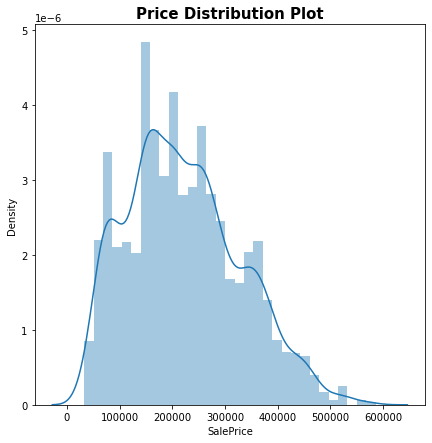

In [3]:
plt.figure(figsize=(7, 7))
sns.distplot(df['SalePrice'])
plt.title('Price Distribution Plot', size=15, weight='bold');

Berdasarkan plot distribusi diatas kurang jelas apakah price berdistribusi normal dengan hanya sedikit outliers atau right-skewed. Oleh karena itu akan dilakukan uji hipotesis normality test untuk memastikan.

In [4]:
from scipy.stats import normaltest

dp_statistics, dp_pvalue = normaltest(df['SalePrice'])
if dp_pvalue > 0.05:
    print(f'P-Value: {dp_pvalue}. Asumsi terdistribusi normal')
else:
    print(f'P-Value: {dp_pvalue}. Asumsi tidak terdistribusi normal')


P-Value: 3.212361214154562e-35. Asumsi tidak terdistribusi normal


Berdasarkan hasil uji hipotesis ternyata data tidak terdistribusi normal, maka price dari appartment right skewed

Lalu akan diperiksa apakah terdapat outliers pada kolom price dan size karena kedua kolom tersebut cukup relevan.

<AxesSubplot:xlabel='SalePrice'>

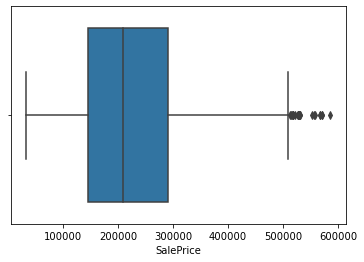

In [5]:
# Cek outliers pada kolom price
sns.boxplot(x = 'SalePrice', data = df)

Berdasarkan visualisasi diatas ternyata terdapat beberapa outliers pada kolom price. Ini cukup masuk akal karena pada umumnya harga dari apartemen memiliki rentang yang besar karena terdapat apartemen yang sangat mahal.

In [6]:
print('max = ', df['SalePrice'].max(), ', min= ',df['SalePrice'].min(), ', range = ', df['SalePrice'].max()-df['SalePrice'].min() )

max =  585840 , min=  32743 , range =  553097


Harga apartemen paling mahal pada data adalah 585840, paling kecil adalah 32743, sehingga range atau rentangnya adalah 553097

<AxesSubplot:xlabel='Size(sqf)'>

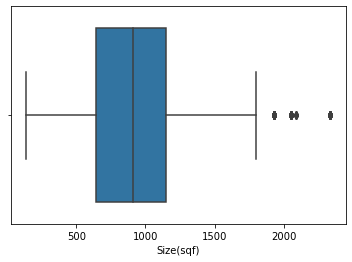

In [7]:
sns.boxplot(x = 'Size(sqf)', data = df)

Berdasarkan visualisasi di atas ternyata kolom size memiliki outliers. Ini berarti ada apartemen dengan ukuran yang jauh lebih besar daripada apartemen lain.

In [8]:
df['YearBuilt'].max()

2015

Dapat dilihat bahwa apartemen terjual yang dibangun paling baru adalah apartemen pada tahun 2015. Karena kita tahu berdasarkan https://www.kaggle.com/datasets/gunhee/koreahousedata/versions/1 dan **data.go.kr** (sumber data) bahwa data tersebut adalah selama periode 10 tahun, maka kita dapat **estimasi bahwa dataset ini dibuat sekitar tahun 2004-2005.**

Selanjutnya akan dicari korelasi dari dataset untuk mengetahui fitur-fitur apa yang memengaruhi price

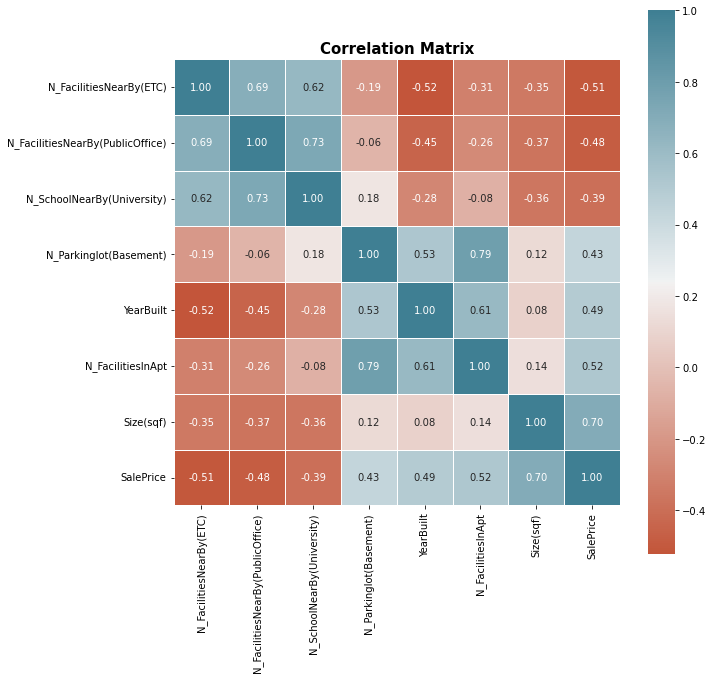

In [9]:
plt.figure(figsize=(10, 10))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');
plt.savefig('svm_confasd.png', dpi=400)

Berikut adalah ranking korelasi antara berbagai kolom numerik dengan price:
1. Size(sqf), korelasi kuat
2. N_FacilitiesInApt, korelasi sedang
3. N_FacilitiesNearBy(ETC), korelasi sedang
4. YearBuilt, korelasi sedang
5. N_FacilitiesNearBy(PublicOffice), korelasi sedang
6. N_Parkinglot(Basement), korelasi sedang
7. N_SchoolNearBy(University), korelasi sedang

Kolom kolom diatas dapat memprediksi sales price karena memiliki korelasi sedang hingga kuat.

In [10]:
df['HallwayType'].value_counts()

terraced    2528
mixed       1131
corridor     464
Name: HallwayType, dtype: int64

Terlihat bahwa jumlah apartemen dengan koridor type terraced paling banyak 

In [11]:
pd.crosstab(index = df['HallwayType'],
           columns = 'median price',
           values = df['SalePrice'],
           aggfunc = 'median').round(2).sort_values(by='median price', ascending=False)

col_0,median price
HallwayType,
terraced,264601
mixed,153539
corridor,74557


Ternyata apartemen dengan hallway type terraced memiliki median harga yang paling besar, lalu diikuti oleh mixed dan terakhir corridor

In [12]:
df['TimeToSubway'].value_counts()

0-5min                1953
5min~10min             787
15min~20min            629
10min~15min            583
no_bus_stop_nearby     171
Name: TimeToSubway, dtype: int64

In [13]:
pd.crosstab(index = df['TimeToSubway'],
           columns = 'median price',
           values = df['SalePrice'],
           aggfunc = 'median').round(2).sort_values(by='median price', ascending=False)

col_0,median price
TimeToSubway,
0-5min,279646
no_bus_stop_nearby,203646
10min~15min,159292
5min~10min,153539
15min~20min,138938


Terlihat bahwa apartemen yang median harga paling tinggi adalah apartemen yang jaraknya menuju subway paling dekat

In [14]:
df['SubwayStation'].value_counts()

Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: SubwayStation, dtype: int64

Telihat bahwa dekat stasiun Kyungbuk Uni Hospital memiliki jumlah apartemen paling banyak

In [15]:
pd.crosstab(index = df['SubwayStation'],
           columns = 'median price',
           values = df['SalePrice'],
           aggfunc = 'median').round(2).sort_values(by='median price', ascending=False)

col_0,median price
SubwayStation,
Banwoldang,315929.0
Sin-nam,247787.0
Kyungbuk_uni_hospital,238938.0
no_subway_nearby,207743.0
Bangoge,167035.0
Myung-duk,154424.5
Chil-sung-market,88495.0
Daegu,86725.0


Pada tabel diatas dapat dilihat bahwa apartemen dekat stasiun Banwoldang memiliki median harga paling tinggi.

# 3. Data Preprocessing

Pada bagian ini akan dilakukan preprocessing seperti mengisi missing value, menghapus data duplikat , melihat outliers dan membuang fitur-fitur yang tidak memengaruhi sales agar mendapatkan dataset yang siap untuk dimasukan ke dalam model.

**Missing Value**

In [16]:
df.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

In [17]:
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,HallwayType,object,0,0.0,3,"[terraced, corridor]"
1,TimeToSubway,object,0,0.0,5,"[no_bus_stop_nearby, 0-5min]"
2,SubwayStation,object,0,0.0,8,"[Sin-nam, Bangoge]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[5.0, 0.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[5.0, 2.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[1.0, 4.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[1174.0, 536.0]"
7,YearBuilt,int64,0,0.0,16,"[1992, 2007]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[8, 3]"
9,Size(sqf),int64,0,0.0,89,"[818, 355]"


Sepertinya tidak ada missing value pada dataset ini.

**Data Duplicatates**

In [18]:
# Menghapus data duplicates
df = df.drop_duplicates()

In [19]:
df.duplicated().sum()

0

**Outliers**

In [20]:
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')        

In [21]:
# Outliers pada sale price
find_anomalies(df['SalePrice'])
print(df[df['SalePrice'] > 521901.5].count()['SalePrice'])

IQR: 147345.0
limit_bawah: -67478.5
limit_atas: 521901.5
17


In [22]:
# Outliers pada size
find_anomalies(df['Size(sqf)'])
print(df[df['Size(sqf)'] > 1803.0].count()['Size(sqf)'])

IQR: 424.0
limit_bawah: 107.0
limit_atas: 1803.0
84


Selanjutnya akan dilakukan feature engineering

**Sale Price**

In [23]:
df['SalePrice'].describe()

count      2701.000000
mean     229511.365790
std      105079.891321
min       32743.000000
25%      153539.000000
50%      221238.000000
75%      300884.000000
max      585840.000000
Name: SalePrice, dtype: float64

In [24]:
# Cek price > $521901.5
df[df['SalePrice'] > 521901.5].count()['SalePrice']

17

Karena missing value pada Sales Price hanya ada 17 maka akan dibiarkan saja karena tidak akan memiliki dampak yang signifikan pada model dan juga agar range dari model dapat lebih luas.

**Size**

In [25]:
df['Size(sqf)'].describe()

count    2701.000000
mean      984.028878
std       391.982619
min       135.000000
25%       743.000000
50%       910.000000
75%      1167.000000
max      2337.000000
Name: Size(sqf), dtype: float64

In [26]:
# Cek price > 1803.0
df[df['Size(sqf)'] > 1803.0].count()['Size(sqf)']

84

Outliers pada kolom size juga akan disimpan karena jumlahnya yang relatif sedikit.

Outliers pada kolom lain tidak akan diperiksa karena tidak relevan

**Clean Dataset**

In [27]:
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4116,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
4117,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


Diatas adalah data yang akan digunakan untuk modeling

# 4. Modeling

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold , StratifiedKFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Data Splitting**

In [29]:
x = df.drop(columns= 'SalePrice')
y = df['SalePrice']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=2020)

Data displit menggunakan train_test_split default yaitu menjadi 75% data train dan 25% data test

**Encoding**

Akan dilakukan encoding pada data-data ketegorik agar dapat dimasukan ke dalam model. Kolom Hallway Type dan time to subway akan menggunakan One hot encoder karena jumlah kelas yang relatif sedikit, sedangkan subway station akan menggunakan binary encoding karena jumlah kelas relatif banyak.

In [31]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['HallwayType','TimeToSubway',]),
    ('binary', ce.BinaryEncoder(), ['SubwayStation'])

], remainder='passthrough')

**Model Benchmark**

In [32]:
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=2020)
rf = RandomForestRegressor(random_state=2020)
xgb = XGBRegressor(random_state=2020)


models = [lr, knn, dt, rf, xgb]

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari score R2, MAE, dan MAPE dari setiap model
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=2020)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i),
    ])

    # R2
    model_cv_r2 = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        )

    print(model_cv_r2, i)

    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[0.7665589  0.7320859  0.74707962 0.76314197 0.72837171] LinearRegression()
[-40291.85198983 -43702.98284102 -43753.47818964 -44930.49846483
 -42186.46833074] LinearRegression()
[-0.21654916 -0.22550586 -0.21719955 -0.2345674  -0.22564706] LinearRegression()
[0.78012086 0.719485   0.75840721 0.78030207 0.76531584] KNeighborsRegressor()
[-38080.96888889 -43655.31950617 -42303.1417284  -41992.88246914
 -38732.18666667] KNeighborsRegressor()
[-0.1946937  -0.21618399 -0.21119124 -0.21428515 -0.2031417 ] KNeighborsRegressor()
[0.81890445 0.76067235 0.81039481 0.80905945 0.80410844] DecisionTreeRegressor(random_state=2020)
[-35273.33178976 -40603.94778628 -38814.04794602 -39105.36067088
 -35997.19875089] DecisionTreeRegressor(random_state=2020)
[-0.18481297 -0.20131149 -0.19314544 -0.20445419 -0.18924896] DecisionTreeRegressor(random_state=2020)
[0.81710988 0.7612384  0.81038162 0.80927959 0.8040931 ] RandomForestRegressor(random_state=2020)
[-35465.96651168 -40545.9777541  -38750.96877191 -

In [33]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_R2': nilai_mean_r2,
    'Std_R2': nilai_std_r2,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_R2,Std_R2,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,0.747448,0.015566,-42973.055963,1598.812565,-0.223894,0.006608
1,KNN Regressor,0.760726,0.022301,-40952.899852,2162.745638,-0.207899,0.007966
2,DecisionTree Regressor,0.800628,0.020538,-37958.777389,2005.117263,-0.194595,0.007331
3,RandomForest Regressor,0.800421,0.020025,-38003.667839,1913.730022,-0.195885,0.006323
4,XGBoost Regressor,0.800448,0.020373,-37982.044979,1968.841598,-0.195085,0.006689


Berdasarkan hasil benchmark diatas terlihat bahwa model Decision Tree Regressor memiliki performa terbaik karena memiliki nilai R2 paling besar dan memiliki nilai MAE dan MAPE yang paling kecil, lalu diikuti oleh model XGBoost dengan nilai performa yang hanya memiliki perbedaan sangat sedikit dibandingkan Decision tree regressor, oleh karena itu akan dianalisis lebih lanjut dengan menggunakan 2 model dengan performa terbaik dan memprediksikannya dengan test set

**Predict to test set using benchmark model**

In [34]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=2020),
    'DT': DecisionTreeRegressor(random_state=2020)
}

score_r2 = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score_r2.append(r2_score(y_test, y_pred))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'R2': score_r2, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,R2,MAE,MAPE
XGB,0.812040,36696.608445,0.186064
DT,0.811839,36721.332832,0.186120


Berdasarkan hasil prediksi dengan test set. terlihat bahwa model XGB memiliki performa sedikit lebih baik dibandingkan model decision tree karena memiliki nilai R2 yang lebih besar dan nilai MAE dan MAPE yang lebih kecil, oleh karena itu model yang akan dipilih adalah model XGBoost dan akan dilanjutkan ke hyperparametric tuning 

**Hyperparametric Tuning**

In [35]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [36]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=2020, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=2020)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 2020  
)

In [37]:
random_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType',
                                                                                'TimeToSubway']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation'])])),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=2020, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [38]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -46718.02167874489
Best_params: {'model__subsample': 0.4, 'model__reg_alpha': 0.1668100537200059, 'model__n_estimators': 140, 'model__max_depth': 3, 'model__learning_rate': 0.11, 'model__gamma': 1, 'model__colsample_bytree': 0.6}


In [39]:
model = {'XGB': XGBRegressor(random_state=2020)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(x_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(x_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'R2': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,R2,MAE,MAPE
XGB,0.814868,36436.113258,0.185532


**Before vs After Tuning**

In [40]:
pd.DataFrame(score_before_tuning.loc['XGB']).T

,R2,MAE,MAPE
XGB,0.81204,36696.608445,0.186064


In [41]:
score_after_tuning

,R2,MAE,MAPE
XGB,0.814868,36436.113258,0.185532


Dapat dilihat bahwa model mengalami performa sedikit lebih baik setelah melakukan tuning.
- R2 mengamali peningkatan sedikit dari 0.812 menjadi 0.814
- MAE dan MAPE mengalami penurunan sedikit

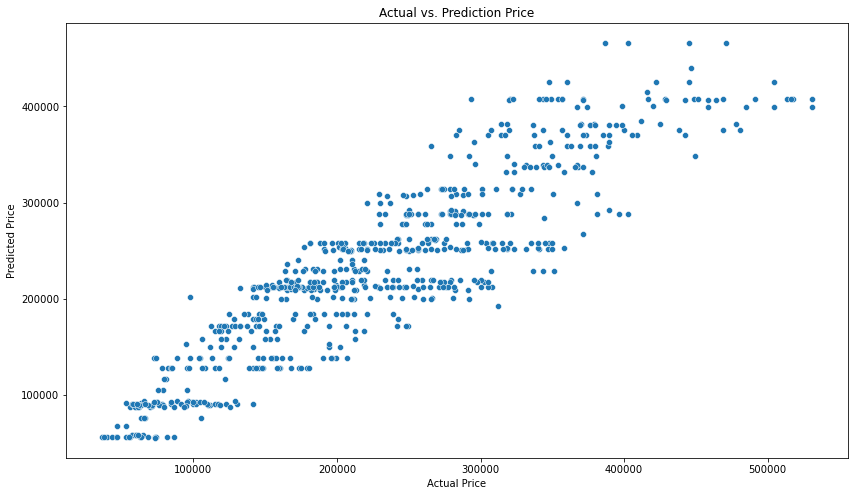

In [42]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Diatas adalah scatterplot harga prediksi dengan harga sesungguhnya. Dapat dilihat dari grafik diatas bahwa model sudah cukup baik untuk memprediksi apartemen dengan range harga yang murah karena dilihat dari titik data yang padat dari range harga 100000-300000, tetapi model mengalami pengurangan performa untuk memprediksi apartemen dengan harga yang mahal yaitu sekitar 400000-500000 dapat dilihat karena titik data yang makin tersebar. Dapat disimpulkan bahwa limitasi dari model adalah tidak terlalu baik untuk memprediksi apartemen dengan harga mahal

**Feature Importance**

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


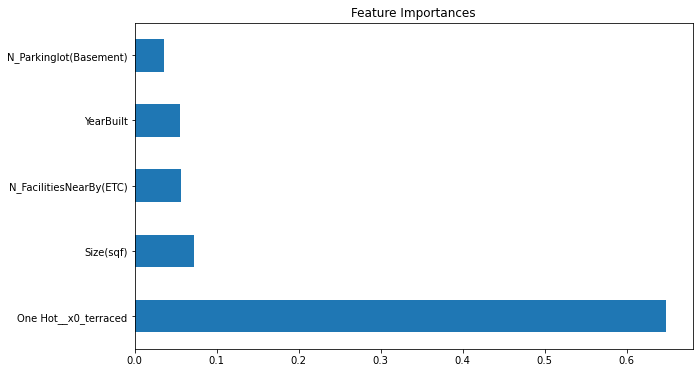

In [43]:
plt.figure(figsize=(10,6))
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

Diatas adalah fitur-fitur yang paling memengaruhi harga dari apartemen.

# 5. Conclusion

Berdasarkan model yang telah dibuat dapat diambil beberapa kesimpulan:
- Model machine learning paling baik untuk dataset ini adalah XGBoost Regressor
- Model memiliki R2 score atau nilai rsquared sebesar 0.81 artinya model dapat menjelaskan 81% dari variansi data.
- Model memiliki MAPE score sebesar 0.18, artinya harga prediksi dapat lebih besar atau lebih kecil 18% dari harga sebenarnya
- Model memiliki MAE score atau residual sebesar 36436 USD, karena range harga apartemen berkisar dari 30000 USD hingga 580000 USD maka residual tersebut dapat dianggap wajar dan tidak terlalu besar.
- Model tidak terlalu baik memprediksi apartemen dengan harga mahal, tetapi sudah cukup baik memprediksi harga apartemen murah.
- Model tidak mempertimbangkan inflasi harga.
- Fitur paling penting untuk memprediksi harga apartemen adalah Hallway type dan size
- Model machine learning dapat memprediksi harga apartemen dengan cepat dan dapat menghemat waktu dan tenaga untuk melakukan prediksi harga dibandingkan dengan melakukan research tiap apartemen satu persatu.

# 6. Recomendation
Untuk memperbaiki model yang dapat dilakukan adalah:
- Mencoba menggunakan model lain seperti Neural Network Regression
- Menambahkan fitur-fitur lain yang dapat memengaruhi harga apartemen, seperti waktu untuk mencapai halte bis terdekat, lantai apartemen, dan jumlah SD,SMP,SMA di dekat apartemen (karena ada fitur jumlah universitas dekat apartemen).
- Menambahkan data baru (update)
- Menggunakan Grid search saat hyperparametric tuning 
- Melakukan hyperparametric tuning untuk model lain yang tidak digunakan (DT,KNN,Linear Regression, Random Forrest) dan membandingkan hasilnya

